In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy.stats import t
from scipy.stats import chi2
from scipy import integrate

In [3]:
def GetHisto(Data,bines):
    
    h,bins = np.histogram(Data,bins=bines)
    w = np.diff(bins)
    m = bins[:-1] + 0.5*w[0]
    
    hnorm = h / (np.sum(h)*w)
    
    return h,hnorm,m,w

In [31]:
mu, sigma = 0,3
N = 1000
normal = norm.rvs(loc=mu,scale=sigma,size=N)

In [32]:
xbins = np.linspace(np.min(normal),np.max(normal),100)
Hb, HNb, mb, w = GetHisto(normal,xbins)
Hb

array([ 1,  1,  2,  2,  0,  0,  0,  2,  2,  4,  0,  1,  2,  3,  6,  8,  4,
        7,  3,  8, 11,  5, 19, 10,  8, 16, 15, 13, 14, 18, 21,  9, 23, 26,
       23, 25, 21, 28, 34, 27, 31, 26, 27, 26, 29, 16, 22, 27, 21, 24, 29,
       21, 23, 22, 25, 21, 13, 14, 14, 15,  7, 19, 12, 10, 11, 10,  7,  7,
        8,  4,  4,  1,  3,  8,  3,  2,  3,  1,  0,  0,  1,  1,  2,  1,  1,
        1,  2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1])

(0.0, 1.0)

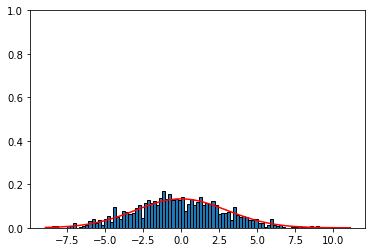

In [33]:
plt.bar( mb, HNb, width=w, ec='k'  )
plt.plot(xbins, norm.pdf(xbins,loc=mu,scale=sigma),color='r')
plt.ylim(0,1)

#for i in range(len(mb)):
#    plt.text( mb[i], 0.02+ np.round( HNb[i],2), \
#            str(np.round( HNb[i]*100,2))+'%', ha='center',fontsize=15  )

In [34]:
np.sum( HNb*xbins[:-1] )

-1.3426204150858376

In [35]:
def normalpdf(x):
    return x**2*norm.pdf(x,loc=mu,scale=sigma)

In [30]:
I,_ = integrate.quad(normalpdf, -np.inf, np.inf)
I

1.000000000000001